Simple layer of neural network math

In [ ]:
import numpy as np
x_input=[2,3,4,5]
w=[[0.3, 0.34,0.4,0.03],
   [0.5,0.2,0.1,0.22],
   [0.23, 0.37,0.4,0.3],
   [0.02, 0.14, 0.17,0.05]]
b=[2, -0.3, 5, 7]

dot_product=np.dot(np.array(w), np.array(x_input))+np.array(b)
print(dot_product)

[5.37 2.8  9.67 8.39]


In [ ]:
#using loop
layer_output=[]
for weight, bais in zip(w,b):
    output=0
    for n_input,weight in zip(x_input,weight):
        output+=n_input*weight
    output+=bais
    layer_output.append(output)
    print(output)

print(layer_output)

5.37
2.8000000000000003
9.67
8.39
[5.37, 2.8000000000000003, 9.67, 8.39]


In [ ]:
t_input=3
t_neuron= 4
t_weights= 0.01 * np.random.randn(t_input, t_neuron)
print(t_weights)

[[-0.00035084  0.01364743  0.01052142 -0.00148679]
 [-0.0096125   0.0012957   0.01746154 -0.00803918]
 [ 0.00364853  0.00898987 -0.0014683   0.00928964]]


In [ ]:
# creating single layer of neural networ from scratch
# we have 3 batches of inputs with 4 input in each batch
input_btach=[[3.5, 2, 1.7, 3.8], [3.7, 2.5, 1.73, 3.4], [2.4, 3.12, 2.12, 1.7]]

# weights of the 1st layer
weight= [
   [0.3, 0.34, 0.4, 0.03],
   [0.5, 0.2, 0.1, 0.22],
   [0.23, 0.37, 0.4, 0.3],
   [0.02, 0.14, 0.17,0.05]
   ]
# bais
bais=[2, -0.3, 5, 1]

layer_output=np.dot(np.array(input_btach),np.array(weight).T)+ np.array(bais)
print(layer_output)

[[4.524  2.856  8.365  1.829 ]
 [4.754  2.971  8.488  1.8881]
 [4.6798 2.11   8.0644 1.9302]]


In [ ]:
# 2nd layer with 3 neuron

weight_2= [[0.34, 0.21, -0.11, 0.37], [0.22, 0.12, 0.28, -0.55], [0.12, 0.42, 0.73, -0.21]]
bais_2=[2, -0.3, 5]

layer_output_2=np.dot(np.array(layer_output),np.array(weight_2).T)+ np.array(bais_2)
print(layer_output_2)

[[ 3.8945    2.37425  12.46476 ]
 [ 4.005187  2.440585 12.618039]
 [ 3.861322  2.179178 11.929446]]


In [14]:
pip install nnfs

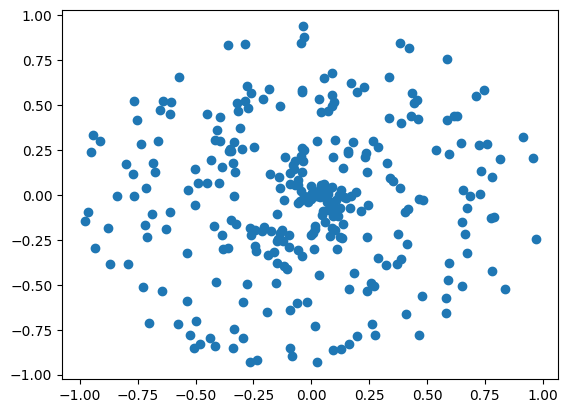

In [15]:
# synthetic data on genertion for nural network
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
import nnfs
nnfs.init()
X, y= spiral_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1])
plt.show()

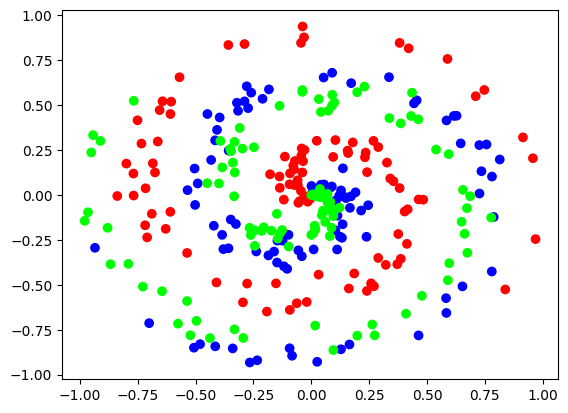

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

#### Simple Neural Network Structure

In [ ]:
class Layer_Dense:
  def __init__(self, n_input, n_neurons):
     self.input= n_input
     self.neuron= n_neurons
     self.weights= 0.01 * np.random.randn(self.input, self.neuron)
     self.bais= np.zeros((1, self.neuron))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.bais

model= Layer_Dense(2,3)
model.forward(X)
print(model.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]


#### **SUM** and **Broadcasting** in python it is very important to understant in neural netowk where metrix multiplication vector multiplication etc occours

In [ ]:
# sum and broadcasting in python and numpy
matrix_a= [[2, 4, 6], [6, 8, 3], [4, 1, 7]]
b=[4,5,6]
print('Sum of the metrix',np.sum(matrix_a))
print(f'Sum of each column {np.sum(matrix_a, axis=0)} shape {np.sum(matrix_a, axis=0).shape}')

# keep the dimession on the metrix
print(f'sUM OF EACH COLUMN with Dimenssion {np.sum(matrix_a, axis=0, keepdims=True)} shape {np.sum(matrix_a, axis=0, keepdims=True).shape}')

print(f'sun of each row {np.sum(matrix_a, axis=1)}')
print(f'Sum of each roe {np.sum(matrix_a, axis=1)} shape {np.sum(matrix_a, axis=1).shape}')
print(f'Sum of each roe with dimession {np.sum(matrix_a, axis=1, keepdims=True)} shape {np.sum(matrix_a, axis=1, keepdims=True).shape}')

# take the max number from each roe and subtract from the element from the row
print(np.max(matrix_a, axis=1, keepdims=True))
print(np.max(matrix_a, axis=1, keepdims=True)-matrix_a)

Sum of the metrix 41
Sum of each column [12 13 16] shape (3,)
sUM OF EACH COLUMN with Dimenssion [[12 13 16]] shape (1, 3)
sun of each row [12 17 12]
Sum of each roe [12 17 12] shape (3,)
Sum of each roe with dimession [[12]
 [17]
 [12]] shape (3, 1)
[[6]
 [8]
 [7]]
[[4 2 0]
 [2 0 5]
 [3 6 0]]


#### RELU Activation function
---
$$ relu(X)= max(0,X) $$

In [ ]:
input=[[1,2,3,2.5],[2.,1.,-1.,2],[2.,2.7, 3.8, -0.8]]
output=np.maximum(0,input)
print(output)

[[1.  2.  3.  2.5]
 [2.  1.  0.  2. ]
 [2.  2.7 3.8 0. ]]


In [ ]:
class ReluActivation:
  def forward(self, inputs):
    self.output= np.maximum(0, inputs)

#### Softmax Function for output layer
---
  $$ S(Xi) = \frac{e^Xi}{\sum_{i=1}^{n}{e^Xi}} $$

---
before implementing softamx in the final layer subtract all the rows values from maximum value from each row to eleminate any extream values

In [ ]:
print(input)
exp_values= np.exp(input-np.max(input, axis=1, keepdims=True))
probabilites= exp_values/np.sum(exp_values, axis=1, keepdims=True)
print(probabilites)

[[1, 2, 3, 2.5], [2.0, 1.0, -1.0, 2], [2.0, 2.7, 3.8, -0.8]]
[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.41362198 0.15216302 0.02059303 0.41362198]
 [0.10959853 0.22070433 0.66303245 0.00666469]]


In [ ]:
class Softmax_Activation:
  def forward(self, inputs):
    exp_values= np.exp(inputs-np.max(inputs, axis=1, keepdims=True))
    print(exp_values.shape)
    probabilites= exp_values/np.sum(exp_values, axis=1, keepdims=True)
    self.output= probabilites

In [ ]:
# create feed forward newural network
dense1= Layer_Dense(2,3)
activation1= ReluActivation()
dense2= Layer_Dense(3,3)
activation2= Softmax_Activation()
dense1.forward(X)
print(dense1.output[:5])
activation1.forward(dense1.output)
print(activation1.output[:5])
dense2.forward(activation1.output)
activation2.forward(dense2.output)
activation2.output[:5]

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-5.5361892e-05 -5.3239353e-05  1.2474808e-04]
 [-1.9669959e-04 -1.9427804e-04  2.5709232e-04]
 [-4.0703916e-04 -4.0962288e-04  2.5589613e-04]
 [-5.3941528e-04 -5.4189982e-04  3.7327429e-04]]
[[0.         0.         0.        ]
 [0.         0.         0.00012475]
 [0.         0.         0.00025709]
 [0.         0.         0.0002559 ]
 [0.         0.         0.00037327]]
(300, 3)


array([[0.33333334, 0.33333334, 0.33333334],
       [0.33333343, 0.33333343, 0.33333316],
       [0.33333352, 0.3333335 , 0.33333296],
       [0.33333352, 0.3333335 , 0.33333296],
       [0.3333336 , 0.33333358, 0.33333278]], dtype=float32)

#### cross entropy (Output from softmax is pass to the entropy layer to calcuate loss)
---
$$ E(X)= -∑Xi*log(S(X)i) $$

In [ ]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])
class_targets = [0, 1, 1]
print(softmax_outputs[range(len(softmax_outputs)), class_targets])

[0.7 0.5 0.9]


In [ ]:
print(-np.log(softmax_outputs[range(len(softmax_outputs)), class_targets]))
neg_log= -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets])
probabilites=np.mean(neg_log)
print(probabilites)

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


if the data is one hot representtation of the target column perform element wise multiplication

In [ ]:
y_true_check = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0]
])

y_pred_clipped_check = np.array([
    [0.7, 0.2, 0.1],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]
])

A = y_true_check*y_pred_clipped_check
B = np.sum(A, axis = 1)
C = - np.log(B)

print(C)
print(np.mean(C))

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


In [ ]:
class Loss:
  def calculate(self, y_pred, y_true):
    loss= self.forward(y_pred, y_true)

    return np.mean(loss)

In [ ]:
class LossCategporialCrossEntropy(Loss):

  def forward(self, y_pred, y_true):
    samples= len(y_pred)
    y_pred_clipped= np.clip(y_pred, 1e-7, 1-1e-7)

    if len(y_true.shape)==1:
      correct_confidance= y_pred_clipped[range(samples), y_true]

    if len(y_true.shape)==2:
      correct_confidance= np.sum(y_pred_clipped*y_true, axis=1)

    negetive_log= -np.log(correct_confidance)
    return negetive_log

In [ ]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])
class_targets = np.array([[1, 0, 0],
 [0, 1, 0],
 [0, 1, 0]])

entropy_loss= LossCategporialCrossEntropy()
loss=entropy_loss.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


np.int64(2)

In [ ]:
#implement the network with loss
layer_1= Layer_Dense(2,3)
activation1= ReluActivation()
layer2= Layer_Dense(3,3)
activation2= Softmax_Activation()

layer_1.forward(X)
activation1.forward(layer_1.output)
layer2.forward(activation1.output)
activation2.forward(layer2.output)
loss_function= LossCategporialCrossEntropy()
loss=loss_function.calculate(activation2.output, y)
print('Loss:',loss)
predictions= np.argmax(activation2.output, axis=1)
print(predictions)
if len(y.shape)==2:
  y= np.argmax(y, axis=1)
accuracy= np.mean(predictions==y)
print('Accuracy:', accuracy)

(300, 3)
Loss: 1.0986054
[0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 0 2 2 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 0 0 2 2 2 0
 2 2 0 2 2 2 2 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 2 2 2 0 0 2 0
 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 0 2 2 2 0 0 0 2 0 2 2 2 2 0 0 0 0 0 0 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 2 2 2 2 2 2 2 2 0 0 2 2 0 2 0 0 0 0 0 0 0
 2 0 0 0 2 0 2 2 2 2 2 2 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2
 2 2 2 2]
Accuracy: 0.31666666666666665


In [ ]:
# random weight and bais for the neural network

# define 1st layer of network
layer_1= Layer_Dense(2,3)
# create a activation layer
activation1= ReluActivation()

# define 2nd layer
layer_2= Layer_Dense(3,3)

# softmax activation layer
activation2= Softmax_Activation()

# define loss on the final layer
loss_function= LossCategporialCrossEntropy()

# helper variable
lowes_loss=99999
best_dense1_weight= dense1.weights.copy
best_dense1_bais= dense1.bais.copy
best_desnse2_weight= dense2.weights.copy
best_dense2_bais= dense2.bais.copy

# connect the layer with input and output
# create 1000 iteration with random weights to find minmal loss
for i in range(10000):
  dense1.weight= 0.05* np.random.randn(2,3)
  dense1.bais= 0.05* np.random.randn(1,3)
  dense2.weight= 0.05* np.random.rand(3,3)
  dense2.bais= 0.05* np.random.randn(1,3)

  #configure the weight and bais
  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)

  #calculate the loss
  loss= loss_function.calculate(activation2.output, y)
  prediction= np.argmax(activation2.output, axis=1)
  accuracy= np.mean(prediction==y)
  if loss<lowes_loss:
    print('New record')
    print('New set of weights found, iteration:', i,'loss:', loss, 'acc:', accuracy)
    best_dense1_weight = dense1.weights.copy()
    best_dense1_bais = dense1.bais.copy()
    best_dense2_weight = dense2.weights.copy()
    best_dense2_bais = dense2.bais.copy()
    lowest_loss = loss

Streaming output truncated to the last 5000 lines.
New record
New set of weights found, iteration: 8333 loss: 1.0988009 acc: 0.3333333333333333
(300, 3)
New record
New set of weights found, iteration: 8334 loss: 1.1002209 acc: 0.3333333333333333
(300, 3)
New record
New set of weights found, iteration: 8335 loss: 1.1017312 acc: 0.3333333333333333
(300, 3)
New record
New set of weights found, iteration: 8336 loss: 1.0988393 acc: 0.3333333333333333
(300, 3)
New record
New set of weights found, iteration: 8337 loss: 1.0990169 acc: 0.3333333333333333
(300, 3)
New record
New set of weights found, iteration: 8338 loss: 1.0988467 acc: 0.3333333333333333
(300, 3)
New record
New set of weights found, iteration: 8339 loss: 1.098818 acc: 0.3333333333333333
(300, 3)
New record
New set of weights found, iteration: 8340 loss: 1.1000757 acc: 0.3333333333333333
(300, 3)
New record
New set of weights found, iteration: 8341 loss: 1.1014122 acc: 0.3333333333333333
(300, 3)
New record
New set of weights fo

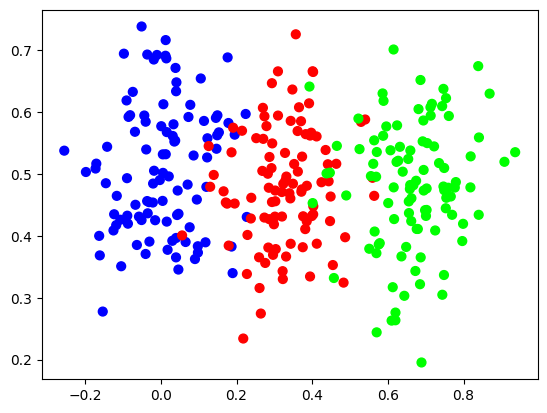

In [ ]:
#SIMPLER DATASET
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()
v_X, v_y = vertical_data(samples=100, classes=3)
plt.scatter(v_X[:, 0],v_X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [ ]:
# random weight and bais for the neural network

# define 1st layer of network
layer_1= Layer_Dense(2,3)
# create a activation layer
activation1= ReluActivation()

# define 2nd layer
layer_2= Layer_Dense(3,3)

# softmax activation layer
activation2= Softmax_Activation()

# define loss on the final layer
loss_function= LossCategporialCrossEntropy()

# helper variable
lowes_loss=99999
best_dense1_weight= dense1.weights.copy()
best_dense1_bais = dense1.bais.copy()
best_desnse2_weight = dense2.weights.copy()
best_dense2_bais = dense2.bais.copy()

# connect the layer with input and output
# create 1000 iteration with random weights to find minmal loss
for i in range(100000):
  dense1.weight += 0.05* np.random.randn(2,3)
  dense1.bais += 0.05* np.random.randn(1,3)
  dense2.weight += 0.05* np.random.rand(3,3)
  dense2.bais += 0.05* np.random.randn(1,3)

  #configure the weight and bais
  dense1.forward(v_X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)

  #calculate the loss
  loss= loss_function.calculate(activation2.output, v_y)
  prediction= np.argmax(activation2.output, axis=1)
  accuracy= np.mean(prediction==v_y)
  if loss<lowes_loss:
    print('New record')
    print('New set of weights found, iteration:', i,'loss:', loss, 'acc:', accuracy)
    best_dense1_weight = dense1.weights.copy()
    best_dense1_bais = dense1.bais.copy()
    best_dense2_weight = dense2.weights.copy()
    best_dense2_bais = dense2.bais.copy()
    lowest_loss = loss

  else:
    dense1.weights = best_dense1_weight.copy()
    dense1.bais = best_dense1_bais.copy()
    dense2.weights = best_dense2_weight.copy()
    dense2.bais = best_dense2_bais

Streaming output truncated to the last 5000 lines.
New record
New set of weights found, iteration: 98333 loss: 6.548646 acc: 0.3333333333333333
(300, 3)
New record
New set of weights found, iteration: 98334 loss: 6.590611 acc: 0.3333333333333333
(300, 3)
New record
New set of weights found, iteration: 98335 loss: 6.628324 acc: 0.3333333333333333
(300, 3)
New record
New set of weights found, iteration: 98336 loss: 6.643631 acc: 0.3333333333333333
(300, 3)
New record
New set of weights found, iteration: 98337 loss: 6.68428 acc: 0.3333333333333333
(300, 3)
New record
New set of weights found, iteration: 98338 loss: 6.63291 acc: 0.3333333333333333
(300, 3)
New record
New set of weights found, iteration: 98339 loss: 6.623501 acc: 0.3333333333333333
(300, 3)
New record
New set of weights found, iteration: 98340 loss: 6.6390715 acc: 0.3333333333333333
(300, 3)
New record
New set of weights found, iteration: 98341 loss: 6.6164536 acc: 0.3333333333333333
(300, 3)
New record
New set of weights f

#### Bacpropagtion of a single neuron

In [ ]:
inputs= np.array([1.0, -2.0, 3.0])
weights= np.array([-3.0, -1.0, 2.0])
bais= 1.0
learning_rate= 0.001
target_output= 0.0
def relu(X):
  return np.maximum(0,X)

def derivative_relu(X):
  return np.where(X>0, 1.0, 0.0)

for i in range(200):
  # assume that there are some output and we are backtacing to the firts layer and updating the weights and bais in the way
  linear_output= np.dot(weights, inputs)+ bais
  # print(linear_output)
  # apply activation layer of the output
  output= relu(linear_output)
  # print(output)
  # calculate the loss
  loss= (output-target_output)**2
  # print(loss)
  # backward pass caalculation of each indivisual
  dloss_doutput= 2*(output-target_output)
  doutput_dlinear= derivative_relu(linear_output)
  dlinear_dweights= inputs
  dlinear_dbais= 1

  dloss_dlinear = dloss_doutput * doutput_dlinear
  dloss_dweights = dloss_dlinear * dlinear_dweights
  # print(dloss_dweights)
  dloss_dbias = dloss_dlinear * dlinear_dbais

  weights -= learning_rate * dloss_dweights
  bais -= learning_rate * dloss_dbias


  print(f"Iteration {i + 1}, Loss: {loss}")

print("Final weights:", weights)
print("Final bias:", bais)


Iteration 1, Loss: 36.0
Iteration 2, Loss: 33.872397424621624
Iteration 3, Loss: 31.87054345809546
Iteration 4, Loss: 29.98699091998773
Iteration 5, Loss: 28.214761511794592
Iteration 6, Loss: 26.54726775906168
Iteration 7, Loss: 24.978326552541866
Iteration 8, Loss: 23.5021050739742
Iteration 9, Loss: 22.11313179151597
Iteration 10, Loss: 20.806246424284897
Iteration 11, Loss: 19.576596334671486
Iteration 12, Loss: 18.41961908608719
Iteration 13, Loss: 17.33101994032309
Iteration 14, Loss: 16.306757070164853
Iteration 15, Loss: 15.343027506224132
Iteration 16, Loss: 14.436253786815284
Iteration 17, Loss: 13.583071280700132
Iteration 18, Loss: 12.780312744165439
Iteration 19, Loss: 12.024995767388878
Iteration 20, Loss: 11.314319082257104
Iteration 21, Loss: 10.64564263994962
Iteration 22, Loss: 10.016485041642266
Iteration 23, Loss: 9.424510031713222
Iteration 24, Loss: 8.867521365009814
Iteration 25, Loss: 8.34345204094211
Iteration 26, Loss: 7.850353118483743
Iteration 27, Loss: 7.3

#### back propagation on a single layer of neural network

In [ ]:
# Initial inputs
import numpy as np

inputs = np.array([1, 2, 3, 4])

# Initial weights and biases
weights = np.array([
    [0.1, 0.2, 0.3, 0.4],
    [0.5, 0.6, 0.7, 0.8],
    [0.9, 1.0, 1.1, 1.2]
])

biases = np.array([0.1, 0.2, 0.3])
learning_rate=0.01
true_output_y= 0
def relu(X):
  return np.maximum(0, X)

def derivative_relu(X):
  return np.where(X > 0, 1.0, 0.0)

for i in range(200):
  # 1st layer calculation weight input product
  z= np.dot(weights, inputs)+biases
  # pass it through activation
  a= relu(z)
  y= np.sum(a)

  loss= (y-true_output_y)**2

  dloss_dlinear= 2*(y-true_output_y)
  dl_da= np.ones_like(a)
  da_dz= derivative_relu(z)

  dz_dw= np.outer(da_dz, inputs)
  dz_db= da_dz
  dz_dx= np.outer(dz_db, weights)

  weights -= learning_rate*dz_dw
  biases -= learning_rate*dz_db

  if i % 20 == 0:
        print(f"Iteration {i}, Loss: {loss}")
# Final weights and biases
print("Final weights:\n", weights)
print("Final biases:\n", biases)

Iteration 0, Loss: 466.56000000000006
Iteration 20, Loss: 37.209999999999994
Iteration 40, Loss: 0.0
Iteration 60, Loss: 0.0
Iteration 80, Loss: 0.0
Iteration 100, Loss: 0.0
Iteration 120, Loss: 0.0
Iteration 140, Loss: 0.0
Iteration 160, Loss: 0.0
Iteration 180, Loss: 0.0
Final weights:
 [[-0.01 -0.02 -0.03 -0.04]
 [ 0.26  0.12 -0.02 -0.16]
 [ 0.53  0.26 -0.01 -0.28]]
Final biases:
 [-0.01 -0.04 -0.07]


In [ ]:
z= np.dot(weights, inputs)+biases
print(z)
# pass it through activation
a= relu(z)
print(a)
y= np.sum(a)
print(y)
loss= y**2

dloss_dlinear= 2*y
print(dloss_dlinear)
dl_da= np.ones_like(a)
print(dl_da)
da_dz= derivative_relu(z)
print(da_dz)
dz_dw= inputs

[ 3.1  7.2 11.3]
[ 3.1  7.2 11.3]
21.6
43.2
[1. 1. 1.]
[1. 1. 1.]


In [ ]:
# Python program explaining
# numpy.outer() function

# importing numpy as geek
import numpy as geek

a = geek.ones(3)
b = [[1,2,3]]
print(a)
print(b)
gfg = geek.outer(b, a)

print (gfg)

[1. 1. 1.]
[[1, 2, 3]]
[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


#### Neural Network with back propagtion

#### $$ Dense Layer $$
---
$$ forward ⇒ Z= X*Wᵀ + b $$
$$ backward (weight update) ⇒ δZ/δW = X* δL/δW $$
$$ backward (input update) ⇒ δZ/δX = W* δL/δX $$
$$ backward (bias update) ⇒ δZ/δb =  \sum δL/δb $$

In [10]:
import numpy as np

class Layer_Dense_v1:
  def __init__(self, n_inputs, n_neurons):
    self.n_inputs= n_inputs
    self.n_neurons= n_neurons
    #initialize weights and bais
    self.weights= 0.01 * np.random.randn(self.n_inputs, self.n_neurons)
    self.bais= np.zeros((1, self.n_neurons))

  def forward(self, inputs):
    self.inputs= inputs
    self.output = np.dot( inputs, self.weights) + self.bais

  def backwards(self, dvalues):
    self.dweights = np.dot(self.inputs.T, dvalues)
    self.dbais = np.sum(dvalues, axis=0, keepdims=True)
    self.dinputs = np.dot(dvalues, self.weights.T)


#### $$ Relu Activation $$
---
$$ relu(X)= max(0,X) $$
  


In [1]:

class Activation_Relu:
  def forward(self, X):
    self.input= X
    self.output= np.maximum(0,X)

  def backward(self, dvalue):
    self.dinputs= dvalue.copy()
    self.dinputs=np.where(self.input>0 ,self.dinputs, 0)

#### $$ SoftmaxActivation $$
---
$$ S(Xi) = \frac{e^Xi}{\sum_{i=1}^{n}{e^Xi}} $$

In [2]:

class Activation_Softmax:
  def forward(self, inputs):
    exp_values= np.exp(inputs-np.max(inputs, axis=1, keepdims=True))
    # print(exp_values.shape)
    probabilites= exp_values/np.sum(exp_values, axis=1, keepdims=True)
    self.output= probabilites


#### Calculate Loss $$ Categorical Cross Entropy Loss $$
---
$$ forward ⇒ L = y_t * log(y_p) $$
$$ bacward ⇒ \delta(L)/δ(y)=y_t/y_p $$

In [13]:
# Common loss class
# Calculates the data and regularization losses
# given model output and ground truth values
# Calculate mean loss
# Return loss
# Common loss class
class Loss:
 # Calculates the data and regularization losses
 # given model output and ground truth values
 def calculate(self, output, y):
  # Calculate sample losses
  sample_losses = self.forward(output, y)
  # Calculate mean loss
  data_loss = np.mean(sample_losses)
  # Return loss
  return data_loss

class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples),y_true]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true,axis=1)

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples

#### it is computationaly expensive to calculate the partial derivative of **loss** w.r.t output **y** and partial derivative of **y** w.r.t  **softmax** rather we can directly compute the derivative of loss w.r.t softmax which is nothing but $$ backward ⇒ δL/δS(X)= (y_p - y_t) $$

In [14]:
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy:
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy() # Use the corrected loss class

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true) # Call forward method of the loss attribute

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples

#### $$ Gradient Descent $$
---
$$ Wn= Wo - α * δL/δW$$

In [15]:
class Optimizer_GD:
  def __init__(self, learning_rate=1.0, decay=0.0):
    self.learning_rate= learning_rate

  def update_params(self, layer):
    layer.weights -= self.learning_rate * layer.dweights
    layer.bais -= self.learning_rate * layer.dbais

#### Gradient Descent with Learning Decay
$$ \alpha = α_o/(1+ (Ldc)*t) $$
- α → Learning Rate
- Ldc → Learning decay Rate
- t → iteration number

In [16]:
class Optimizer_GD_with_decay:
  def __init__(self, learning_rate=1.0, decay=0.0):
    self.learning_rate= learning_rate
    self.current_learning_rate= learning_rate
    self.decay= decay
    self.iterations= 0

  def pre_update_params(self):
    if self.decay:
      self.iterations += 1
      self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

  def update_params(self, layer):
    layer.weights -= self.current_learning_rate * layer.dweights
    layer.bais -= self.current_learning_rate * layer.dbais


#### Gradient Descent with Momentum

In [17]:
class Optimizer_GD_with_momentum:
  def __init__(self, learning_rate=1.0, decay=0.0, momentum=0.):
    self.learning_rate= learning_rate
    self.current_learning_rate= learning_rate
    self.decay= decay
    self.iterations= 0
    self.momentum= momentum

  def pre_update_params(self):
    if self.decay:
      self.iterations += 1
      self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

  def update_params(self, layer):
    if self.momentum:
      # if layer do not has any momentum filled them with 0
      if not hasattr(layer, 'weight_momentums'):
        layer.weight_momentums = np.zeros_like(layer.weights)
        layer.bias_momentums = np.zeros_like(layer.bais)

      weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
      self.weight_momentums = weight_updates

      bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbais
      self.bias_momentums = bias_updates
    else:
      weight_updates = -self.current_learning_rate * layer.dweights
      bias_updates = -self.current_learning_rate * layer.dbais

    layer.weights += weight_updates
    layer.bais += bias_updates


#### Gradient Descent with AdaGrad

$$ \alpha = \frac{α_o}{(1+ (Ldc)*t)} $$
- α → Learning Rate
- Ldc → Learning decay Rate
- t → iteration number

Weight Update
$$ cache= cache+paramgradient^2 $$
$$ ⇒ W_n= W_o-α*\frac{paramgradient}{\sqrt{cache}+ϵ} $$


In [18]:
import numpy as np

# Adagrad optimizer
class Optimizer_Adagrad:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=1., decay=0., epsilon=1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If layer does not contain cache arrays, create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.bais)

        # Update cache with squared current gradients
        layer.weight_cache += layer.dweights**2
        layer.bias_cache += layer.dbais**2

        # Vanilla SGD parameter update + normalization with square rooted cache
        layer.weights += -self.current_learning_rate * \
            layer.dweights / \
            (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.bais += -self.current_learning_rate * \
            layer.dbais / \
            (np.sqrt(layer.bias_cache) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


#### Gradient Descent with RMSprop

$$ \alpha = \frac{α_o}{(1+ (Ldc)*t)} $$
- α → Learning Rate
- Ldc → Learning decay Rate
- t → iteration number

Weight Update
$$ cache= (ρ)*cache+ (1-ρ)*paramgradient^2 $$
$$ ⇒ W_n= W_o-α*\frac{paramgradient}{\sqrt{cache}+ϵ} $$
- $$ ρ ≡0.9 $$

In [19]:
class Optimizer_RMSprop_v1:
  def __init__(self, learning_rate=0.01, decay=0., epsilon=1e-7, rho=0.9):
    self.learning_rate= learning_rate
    self.current_learning_rate= learning_rate
    self.decay= decay
    self.epsilon= epsilon
    self.iterations=0
    self.rho=rho

  def pre_update_params(self):
    # learning decay

    if self.decay:
      self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

  def update_params(self, layer):
    if not hasattr(layer, 'weight_cache'):
      layer.weight_cache= np.zeros_like(layer.weights)
      layer.bias_cache= np.zeros_like(layer.bais)

    layer.weight_cache= self.rho*layer.weight_cache + (1-self.rho)*layer.dweights**2
    layer.bias_cache= self.rho*layer.bias_cache + (1-self.rho)*layer.dbais**2

    layer.weights += -self.current_learning_rate * \
            layer.dweights / \
            (np.sqrt(layer.weight_cache) + self.epsilon)
    layer.bais += -self.current_learning_rate * \
            layer.dbais / \
            (np.sqrt(layer.bias_cache) + self.epsilon)


  def post_update_params(self):
    self.iterations += 1

#### Gradient Descent with Adams

In [20]:
class Optimizer_Adam:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):
        # If layer does not contain cache arrays, create
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.bais)
            layer.bias_cache = np.zeros_like(layer.bais)

        # Update momentum with current gradients
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbais

        # Get corrected momentum
        # self.iteration is 0 at first pass and we need to start with 1 here
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        # Update cache with squared current gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbais**2

        # Get corrected cache
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

        # Vanilla SGD parameter update + normalization with square rooted cache
        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.bais += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [21]:
import numpy as np

class Optimizer_RMSprop:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.bais)

        # Update cache with squared current gradients
        layer.weight_cache = self.rho * layer.weight_cache + \
                             (1 - self.rho) * layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + \
                           (1 - self.rho) * layer.dbais**2

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         layer.dweights / \
                         (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.bais += -self.current_learning_rate * \
                        layer.dbais / \
                        (np.sqrt(layer.bias_cache) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


Implementing Neural Network backpropagation with with Sythetic data

In [6]:
pip install nnfs

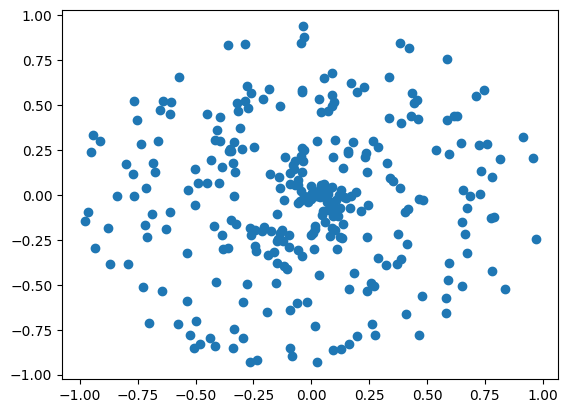

In [7]:
# synthetic data on genertion for nural network
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
import nnfs
nnfs.init()
X, y= spiral_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1])
plt.show()

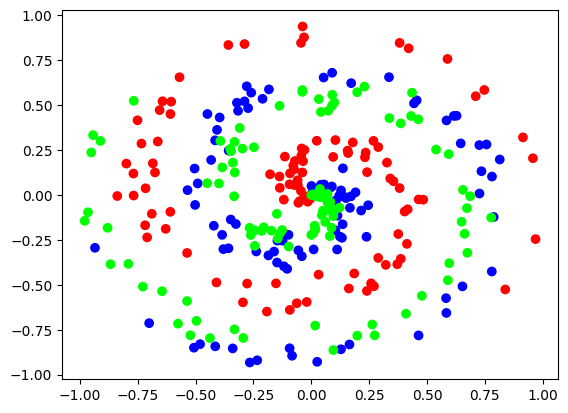

In [ ]:
plt.scatter(X[:,0], X[:,1],c=y, cmap='brg')

#### Optimization with Gradient Descent without learning decay

In [ ]:
dense1 = Layer_Dense_v1(2, 64)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_Relu()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense_v1(64, 3)
# Create Softmax classifier’s combined loss and activation
loss_act = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer= Optimizer_GD()
for epoc in range(10000):

  # forward pass
  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  # activation2.forward(layer2.output)
  loss= loss_act.forward(dense2.output, y)

  prediction= np.argmax(loss_act.output, axis=1)
  if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
  accuracy= np.mean(prediction==y)
  # print('acc', accuracy)
  if not  epoc % 100:
    print(f'epoc: {epoc}, acc: {accuracy:.3f}, loss: {loss:.3f}')

  # backward pass
  loss_act.backward(loss_act.output, y)
  dense2.backwards(loss_act.dinputs)
  activation1.backward(dense2.dinputs)
  dense1.backwards(activation1.dinputs)

  optimizer.update_params(dense1)
  optimizer.update_params(dense2)


epoc: 0, acc: 0.269, loss: 1.099
epoc: 100, acc: 0.435, loss: 1.080
epoc: 200, acc: 0.446, loss: 1.070
epoc: 300, acc: 0.430, loss: 1.069
epoc: 400, acc: 0.430, loss: 1.069
epoc: 500, acc: 0.431, loss: 1.069
epoc: 600, acc: 0.430, loss: 1.068
epoc: 700, acc: 0.430, loss: 1.067
epoc: 800, acc: 0.429, loss: 1.065
epoc: 900, acc: 0.428, loss: 1.060
epoc: 1000, acc: 0.432, loss: 1.052
epoc: 1100, acc: 0.436, loss: 1.042
epoc: 1200, acc: 0.458, loss: 1.029
epoc: 1300, acc: 0.474, loss: 1.015
epoc: 1400, acc: 0.422, loss: 1.015
epoc: 1500, acc: 0.434, loss: 1.010
epoc: 1600, acc: 0.437, loss: 1.004
epoc: 1700, acc: 0.438, loss: 1.001
epoc: 1800, acc: 0.434, loss: 0.996
epoc: 1900, acc: 0.434, loss: 0.991
epoc: 2000, acc: 0.429, loss: 0.984
epoc: 2100, acc: 0.495, loss: 0.972
epoc: 2200, acc: 0.476, loss: 0.980
epoc: 2300, acc: 0.499, loss: 0.961
epoc: 2400, acc: 0.487, loss: 0.941
epoc: 2500, acc: 0.514, loss: 0.933
epoc: 2600, acc: 0.496, loss: 0.921
epoc: 2700, acc: 0.548, loss: 0.913
epoc

In [ ]:
# with learning rate decay
dense1 = Layer_Dense_v1(2, 64)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_Relu()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense_v1(64, 3)
# Create Softmax classifier’s combined loss and activation
loss_act = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer= Optimizer_GD_with_decay(decay=1e-3)
for epoc in range(10001):

  # forward pass
  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  # activation2.forward(layer2.output)
  loss= loss_act.forward(dense2.output, y)

  prediction= np.argmax(loss_act.output, axis=1)
  if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
  accuracy= np.mean(prediction==y)
  # print('acc', accuracy)
  if not  epoc % 100:
    print(f'epoc: {epoc}, acc: {accuracy:.3f}, loss: {loss:.3f}, learning: {optimizer.current_learning_rate} ')

  # backward pass
  loss_act.backward(loss_act.output, y)
  dense2.backwards(loss_act.dinputs)
  activation1.backward(dense2.dinputs)
  dense1.backwards(activation1.dinputs)


  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.pre_update_params()
  # optimizer.post_update_params()


epoc: 0, acc: 0.410, loss: 1.099, learning: 1.0 
epoc: 100, acc: 0.410, loss: 1.090, learning: 0.9090909090909091 
epoc: 200, acc: 0.420, loss: 1.078, learning: 0.8333333333333334 
epoc: 300, acc: 0.423, loss: 1.076, learning: 0.7692307692307692 
epoc: 400, acc: 0.410, loss: 1.075, learning: 0.7142857142857143 
epoc: 500, acc: 0.417, loss: 1.074, learning: 0.6666666666666666 
epoc: 600, acc: 0.417, loss: 1.072, learning: 0.625 
epoc: 700, acc: 0.433, loss: 1.071, learning: 0.588235294117647 
epoc: 800, acc: 0.440, loss: 1.068, learning: 0.5555555555555556 
epoc: 900, acc: 0.450, loss: 1.066, learning: 0.5263157894736842 
epoc: 1000, acc: 0.457, loss: 1.063, learning: 0.5 
epoc: 1100, acc: 0.463, loss: 1.059, learning: 0.47619047619047616 
epoc: 1200, acc: 0.473, loss: 1.055, learning: 0.45454545454545453 
epoc: 1300, acc: 0.467, loss: 1.050, learning: 0.4347826086956522 
epoc: 1400, acc: 0.463, loss: 1.045, learning: 0.41666666666666663 
epoc: 1500, acc: 0.470, loss: 1.040, learning: 0

#### optimization with momentum

In [ ]:
class Optimizer_SGD:
    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If we use momentum
        if self.momentum:
            # If layer does not contain momentum arrays, create them
            # filled with zeros
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.bais)

            # Build weight updates with momentum - take previous
            # updates multiplied by retain factor and update with
            # current gradients
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            self.weight_momentums = weight_updates

            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbais
            self.bias_momentums = bias_updates

        # Vanilla SGD updates (as before momentum update)
        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.bais

        # Update weights and biases using either
        # vanilla or momentum updates
        layer.weights += weight_updates
        layer.bais += bias_updates

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [ ]:
import numpy as np

# Assuming the necessary classes (Layer_Dense, Activation_ReLU,
# Activation_Softmax_Loss_CategoricalCrossentropy, Optimizer_SGD, and spiral_data) are defined elsewhere

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense_v1(2, 10)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_Relu()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense_v1(10, 3)

# Create Softmax classifier's combined loss and activation
loss_activation =Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD(decay=1e-4, momentum=0.9)

# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backwards(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backwards(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


epoch: 0, acc: 0.393, loss: 1.099, lr: 1.0
epoch: 100, acc: 0.440, loss: 1.072, lr: 0.9901970492127933
epoch: 200, acc: 0.417, loss: 1.060, lr: 0.9804882831650161
epoch: 300, acc: 0.410, loss: 1.059, lr: 0.9709680551509855
epoch: 400, acc: 0.410, loss: 1.058, lr: 0.9616309260505818
epoch: 500, acc: 0.410, loss: 1.058, lr: 0.9524716639679969
epoch: 600, acc: 0.417, loss: 1.057, lr: 0.9434852344560807
epoch: 700, acc: 0.420, loss: 1.057, lr: 0.9346667912889054
epoch: 800, acc: 0.417, loss: 1.056, lr: 0.9260116677470135
epoch: 900, acc: 0.420, loss: 1.055, lr: 0.9175153683824203
epoch: 1000, acc: 0.427, loss: 1.054, lr: 0.9091735612328392
epoch: 1100, acc: 0.447, loss: 1.053, lr: 0.9009820704567978
epoch: 1200, acc: 0.447, loss: 1.051, lr: 0.892936869363336
epoch: 1300, acc: 0.447, loss: 1.050, lr: 0.8850340738118416
epoch: 1400, acc: 0.460, loss: 1.049, lr: 0.8772699359592947
epoch: 1500, acc: 0.453, loss: 1.048, lr: 0.8696408383337683
epoch: 1600, acc: 0.440, loss: 1.048, lr: 0.86214328

#### Optimization with AdaGrad

epoch: 0, acc: 0.303, loss: 1.099, lr: 1.0
epoch: 100, acc: 0.423, loss: 1.032, lr: 0.9901970492127933
epoch: 200, acc: 0.433, loss: 1.006, lr: 0.9804882831650161
epoch: 300, acc: 0.490, loss: 0.989, lr: 0.9709680551509855
epoch: 400, acc: 0.510, loss: 0.977, lr: 0.9616309260505818
epoch: 500, acc: 0.550, loss: 0.926, lr: 0.9524716639679969
epoch: 600, acc: 0.543, loss: 0.892, lr: 0.9434852344560807
epoch: 700, acc: 0.513, loss: 0.872, lr: 0.9346667912889054
epoch: 800, acc: 0.553, loss: 0.855, lr: 0.9260116677470135
epoch: 900, acc: 0.573, loss: 0.832, lr: 0.9175153683824203
epoch: 1000, acc: 0.620, loss: 0.781, lr: 0.9091735612328392
epoch: 1100, acc: 0.613, loss: 0.745, lr: 0.9009820704567978
epoch: 1200, acc: 0.643, loss: 0.766, lr: 0.892936869363336
epoch: 1300, acc: 0.647, loss: 0.718, lr: 0.8850340738118416
epoch: 1400, acc: 0.650, loss: 0.704, lr: 0.8772699359592947
epoch: 1500, acc: 0.693, loss: 0.692, lr: 0.8696408383337683
epoch: 1600, acc: 0.700, loss: 0.675, lr: 0.86214328

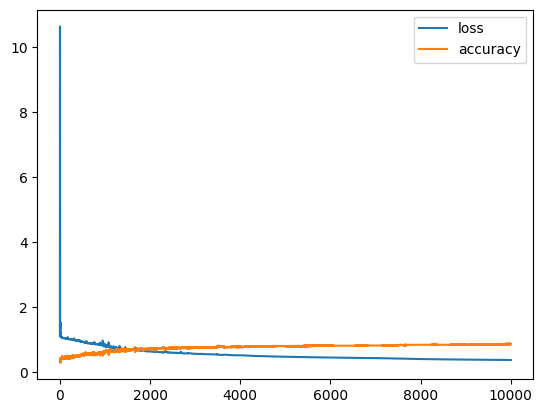

In [ ]:

dense1= Layer_Dense_v1(2, 64)
activation1= Activation_Relu()
dense2= Layer_Dense_v1(64, 3)
loss_activation= Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer= Optimizer_Adagrad(decay=1e-4, epsilon=1e-7)

ada_loss_history=[]
ada_accuracy_history=[]
for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss= loss_activation.forward(dense2.output, y)

    prediction= np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy= np.mean(prediction==y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    loss_activation.backward(loss_activation.output, y)
    dense2.backwards(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backwards(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

    ada_loss_history.append(loss)
    ada_accuracy_history.append(accuracy)

#plot
plt.plot(ada_loss_history, label='loss')
plt.plot(ada_accuracy_history, label='accuracy')
plt.legend()
plt.show()

#### Optimization with RMSProp and Adam


epoch: 0, acc: 0.269, loss: 1.099, lr: 0.02
epoch: 100, acc: 0.464, loss: 0.970, lr: 0.01998021958261321
epoch: 200, acc: 0.542, loss: 0.872, lr: 0.019960279044701046
epoch: 300, acc: 0.590, loss: 0.815, lr: 0.019940378268975763
epoch: 400, acc: 0.623, loss: 0.792, lr: 0.01992051713662487
epoch: 500, acc: 0.621, loss: 0.782, lr: 0.01990069552930875
epoch: 600, acc: 0.635, loss: 0.774, lr: 0.019880913329158343
epoch: 700, acc: 0.636, loss: 0.767, lr: 0.019861170418772778
epoch: 800, acc: 0.643, loss: 0.761, lr: 0.019841466681217078
epoch: 900, acc: 0.645, loss: 0.755, lr: 0.01982180200001982
epoch: 1000, acc: 0.652, loss: 0.751, lr: 0.019802176259170884
epoch: 1100, acc: 0.640, loss: 0.748, lr: 0.01978258934311912
epoch: 1200, acc: 0.655, loss: 0.742, lr: 0.01976304113677013
epoch: 1300, acc: 0.653, loss: 0.739, lr: 0.019743531525483964
epoch: 1400, acc: 0.646, loss: 0.736, lr: 0.01972406039507293
epoch: 1500, acc: 0.660, loss: 0.732, lr: 0.019704627631799327
epoch: 1600, acc: 0.646, lo

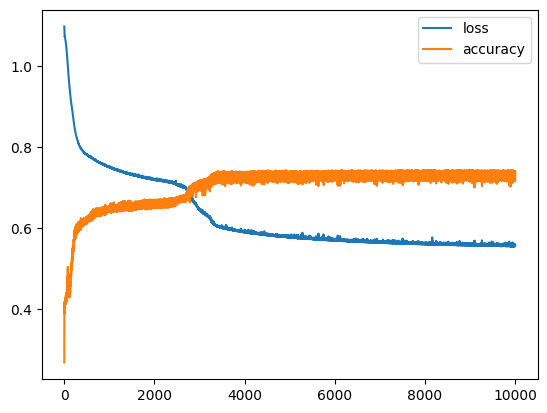

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Create dataset
# X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense_v1(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_Relu()

# Create second Dense layer with 64 input features (as we take output of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense_v1(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
# optimizer = Optimizer_SGD(decay=8e-8, momentum=0.9)
#optimizer = Optimizer_Adagrad(decay=1e-4)
#optimizer = Optimizer_RMSprop(decay=1e-4)
# optimizer = Optimizer_RMSprop(learning_rate=0.02, decay=1e-5,rho=0.999)
optimizer = Optimizer_Adam(learning_rate=0.02, decay=1e-5)

loss_history = []
accuracy_history = []
# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backwards(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backwards(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

    #plot the loss and accuracy graph
    loss_history.append(loss)
    accuracy_history.append(accuracy)

#plot
plt.plot(loss_history, label='loss')
plt.plot(accuracy_history, label='accuracy')
plt.legend()
plt.show()

#### Generalization of network

Here out model is over fitting

In [26]:
X_test, y_test = spiral_data(samples=50, classes=3)

dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss = loss_activation.forward(dense2.output, y_test)

predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test)
print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

validation, acc: 0.727, loss: 0.609


### Recreate The Entire Neural Network with Rgularization

#### Dense Layer V2

In [8]:
# RSMA weight intialization techniques and regularization
import numpy as np
class Layer_Dense_v2:
  def __init__(self, n_inputs, n_neurons,
               weigt_geg_l1=0, bias_reg_l1=0,
               weight_reg_l2=0, bias_reg_l2=0, weight_intialization='random') -> None:
     if weight_intialization=='random':
      self.weights= np.random.randn(n_inputs, n_neurons)
     elif weight_intialization=='he':
      self.weights=  np.random.randn(n_inputs, n_neurons) * np.sqrt(2.0 /n_inputs)
     self.bias= np.zeros((1, n_neurons))
     self.weight_reg_l1= weigt_geg_l1
     self.bias_reg_l1= bias_reg_l1
     self.weight_reg_l2= weight_reg_l2
     self.bias_reg_l2= bias_reg_l2

  def forward(self, inputs):
    self.inputs= inputs
    self.output= np.dot(inputs, self.weights) + self.bias

  def backwards(self, dvalues):

    self.dweights= np.dot(self.inputs.T, dvalues)
    self.dbias= np.sum(dvalues, axis=0, keepdims=True)

    # chek for the regulairization parameters
    if self.weight_reg_l1 > 0:
      dL1= np.ones_like(self.weights)
      dL1[self.weights < 0] = -1
      self.dweights += self.weight_reg_l1 * dL1

    if self.bias_reg_l1 > 0:
      dL1= np.ones_like(self.bias)
      dL1[self.bias < 0] = -1
      self.dbias += self.bias_reg_l1 * dL1

    if self.weight_reg_l2 > 0:
      self.dweights += 2 * self.weight_reg_l2 * self.weights

    if self.bias_reg_l2 > 0:
      self.dbias += 2 * self.bias_reg_l2 * self.bias

    self.dinputs= np.dot(dvalues, self.weights.T)

#### Loss with Regularization

In [4]:
# loss with regularization
class Loss_v1:
  def regularization_loss(self, layer):
    self.reg_loss= 0
    if layer.weight_reg_l1 > 0:
      self.reg_loss += layer.weight_reg_l1 * np.sum(np.abs(layer.weights))
    if layer.weight_reg_l2 > 0:
      self.reg_loss += layer.weight_reg_l2 * np.sum(layer.weights * layer.weights)
    if layer.bias_reg_l1 > 0:
      self.reg_loss += layer.bias_reg_l1 * np.sum(np.abs(layer.bias))
    if layer.bias_reg_l2 > 0:
      self.reg_loss += layer.bias_reg_l2 * np.sum(layer.bias * layer.bias)
    return self.reg_loss

  def calculate(self, output, y):
    sample_losses= self.forward(output, y)
    data_loss= np.mean(sample_losses)
    return data_loss


class Loss_CategoricalCrossentropy_reg(Loss_v1):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples),y_true]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true,axis=1)

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples

#### Corss Entropy Loss Calculation

In [5]:
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy:
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy_reg() # Use the corrected loss class

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true) # Call forward method of the loss attribute

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples

#### Adam Optimizer for regularization

In [6]:
class Optimizer_Adam_Reg:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):
        # If layer does not contain cache arrays, create
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.bias)
            layer.bias_cache = np.zeros_like(layer.bias)

        # Update momentum with current gradients
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbias

        # Get corrected momentum
        # self.iteration is 0 at first pass and we need to start with 1 here
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        # Update cache with squared current gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbias**2

        # Get corrected cache
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

        # Vanilla SGD parameter update + normalization with square rooted cache
        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.bias += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [9]:
# create neural network for training assumer 12550 data point 80, 20 split
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
import nnfs
nnfs.init()
X, y = spiral_data(samples=1000, classes=3)
dense1= Layer_Dense_v2(2, 64, weight_reg_l2=5e-4, bias_reg_l2=5e-4)
activation1= Activation_Relu()
dense2= Layer_Dense_v2(64,3, weight_reg_l2=5e-4, bias_reg_l2=5e-4, weight_intialization='he')
loss_activation= Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer= Optimizer_Adam_Reg(learning_rate=0.02, decay=1e-5)
for epoc in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)

    data_loss= loss_activation.forward(dense2.output, y)
    reg_loss= loss_activation.loss.regularization_loss(dense1) + loss_activation.loss.regularization_loss(dense2)
    loss= data_loss + reg_loss

    prediction= np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy= np.mean(prediction==y)

    if not epoc % 100:
        print(f'epoc: {epoc}, accuracy: {accuracy:.3f}, loss: {loss:.3f}, reg_weight_loss: {reg_loss:.3f}, reg_bias_loss: {reg_loss:.3f}, Learning: {optimizer.current_learning_rate}')

    loss_activation.backward(loss_activation.output, y)
    dense2.backwards(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backwards(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()



epoc: 0, accuracy: 0.323, loss: 1.365, reg_weight_loss: 0.077, reg_bias_loss: 0.077, Learning: 0.02
epoc: 100, accuracy: 0.561, loss: 1.001, reg_weight_loss: 0.053, reg_bias_loss: 0.053, Learning: 0.01998021958261321
epoc: 200, accuracy: 0.697, loss: 0.935, reg_weight_loss: 0.160, reg_bias_loss: 0.160, Learning: 0.019960279044701046
epoc: 300, accuracy: 0.778, loss: 0.922, reg_weight_loss: 0.197, reg_bias_loss: 0.197, Learning: 0.019940378268975763
epoc: 400, accuracy: 0.789, loss: 0.920, reg_weight_loss: 0.210, reg_bias_loss: 0.210, Learning: 0.01992051713662487
epoc: 500, accuracy: 0.796, loss: 0.919, reg_weight_loss: 0.215, reg_bias_loss: 0.215, Learning: 0.01990069552930875
epoc: 600, accuracy: 0.794, loss: 0.919, reg_weight_loss: 0.219, reg_bias_loss: 0.219, Learning: 0.019880913329158343
epoc: 700, accuracy: 0.804, loss: 0.918, reg_weight_loss: 0.221, reg_bias_loss: 0.221, Learning: 0.019861170418772778
epoc: 800, accuracy: 0.792, loss: 0.918, reg_weight_loss: 0.223, reg_bias_los

In [11]:
# test the data
X_test, y_test = spiral_data(samples=250, classes=3)
dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss = loss_activation.forward(dense2.output, y_test)

predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test)
print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

validation, acc: 0.788, loss: 0.706


As we see in the network with regulairization we can reduce the over fitting without regularization the model was overfitting

#### create 2 visualization 1 with random weights initialize then perform the back propagation which will give you final weights and bais which will be used in final visualization


In [46]:
import numpy as np
import plotly.graph_objects as go

# -----------------------------
# 1. Helper: visualize network
# -----------------------------
def visualize_network(weights_input_hidden, weights_hidden_output, title="Neural Network"):
    n_input = weights_input_hidden.shape[0]
    n_hidden = weights_input_hidden.shape[1]
    n_output = weights_hidden_output.shape[1]

    # Positions of neurons
    x_positions = [0, 1, 2]  # input, hidden, output
    y_positions = {
        0: np.linspace(-1, 1, n_input),
        1: np.linspace(-1, 1, n_hidden),
        2: np.linspace(-1, 1, n_output)
    }

    fig = go.Figure()

    # Draw edges Input -> Hidden
    for i in range(n_input):
        for j in range(n_hidden):
            w = weights_input_hidden[i, j]
            fig.add_trace(go.Scatter(
                x=[x_positions[0], x_positions[1]],
                y=[y_positions[0][i], y_positions[1][j]],
                mode="lines",
                line=dict(width=abs(w)*5, color="red" if w < 0 else "blue"),
                opacity=0.6,
                showlegend=False
            ))

    # Draw edges Hidden -> Output
    for i in range(n_hidden):
        for j in range(n_output):
            w = weights_hidden_output[i, j]
            fig.add_trace(go.Scatter(
                x=[x_positions[1], x_positions[2]],
                y=[y_positions[1][i], y_positions[2][j]],
                mode="lines",
                line=dict(width=abs(w)*5, color="red" if w < 0 else "blue"),
                opacity=0.6,
                showlegend=False
            ))

    # Draw neurons
    for layer, x in enumerate(x_positions):
        y = y_positions[layer]
        fig.add_trace(go.Scatter(
            x=[x]*len(y), y=y,
            mode="markers",
            marker=dict(size=30, color="lightgrey", line=dict(width=2, color="black")),
            name=f"Layer {layer}"
        ))

    fig.update_layout(
        title=title,
        showlegend=False,
        xaxis=dict(showticklabels=False, zeroline=False, showgrid=False),
        yaxis=dict(showticklabels=False, zeroline=False, showgrid=False),
        plot_bgcolor="white",
        margin=dict(l=20, r=20, t=40, b=20)
    )
    return fig



np.random.seed(42)
weights_input_hidden = np.random.randn(2, 10) * 0.5  # 2 inputs -> 10 hidden
weights_hidden_output = np.random.randn(10, 3) * 0.5  # 10 hidden -> 3 outputs

fig_random = visualize_network(weights_input_hidden, weights_hidden_output,
                               title="Random (Untrained) Network")
fig_random.show()


trained_input_hidden = weights_input_hidden * 2  # exaggerate training effect
trained_hidden_output = weights_hidden_output * 2

fig_trained = visualize_network(trained_input_hidden, trained_hidden_output,
                                title="Trained Network")
fig_trained.show()


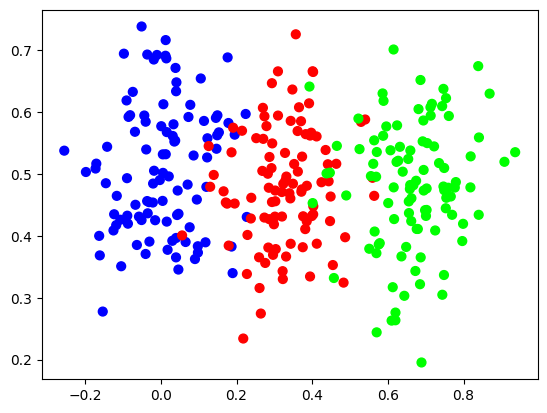

In [17]:
# using vertical data
from nnfs.datasets import vertical_data
nnfs.init()
v_X, v_y = vertical_data(samples=100, classes=3)
plt.scatter(v_X[:, 0],v_X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [19]:
# create neural network for training assumer 12550 data point 80, 20 split
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
dense1= Layer_Dense_v2(2, 10, weight_reg_l2=5e-4, bias_reg_l2=5e-4)

#take the untrained weight and bias of layer 1
un_traind_weight_layer1= dense1.weights
un_traind_bias_layer1= dense1.bias

activation1= Activation_Relu()
dense2= Layer_Dense_v2(10,3, weight_reg_l2=5e-4, bias_reg_l2=5e-4, weight_intialization='he')

#take the untrained weight and bias of layer 1
un_traind_weight_layer2= dense2.weights
un_traind_bias= dense2.bias

loss_activation= Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer= Optimizer_Adam_Reg(learning_rate=0.02, decay=1e-5)
for epoc in range(10001):
    dense1.forward(v_X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)

    data_loss= loss_activation.forward(dense2.output, y)
    reg_loss= loss_activation.loss.regularization_loss(dense1) + loss_activation.loss.regularization_loss(dense2)
    loss= data_loss + reg_loss

    prediction= np.argmax(loss_activation.output, axis=1)
    if len(v_y.shape) == 2:
        v_y = np.argmax(v_y, axis=1)
    accuracy= np.mean(prediction==y)

    if not epoc % 100:
        print(f'epoc: {epoc}, accuracy: {accuracy:.3f}, loss: {loss:.3f}, reg_weight_loss: {reg_loss:.3f}, reg_bias_loss: {reg_loss:.3f}, Learning: {optimizer.current_learning_rate}')

    loss_activation.backward(loss_activation.output, v_y)
    dense2.backwards(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backwards(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()



epoc: 0, accuracy: 0.273, loss: 1.108, reg_weight_loss: 0.010, reg_bias_loss: 0.010, Learning: 0.02
epoc: 100, accuracy: 0.927, loss: 0.223, reg_weight_loss: 0.047, reg_bias_loss: 0.047, Learning: 0.01998021958261321
epoc: 200, accuracy: 0.927, loss: 0.218, reg_weight_loss: 0.042, reg_bias_loss: 0.042, Learning: 0.019960279044701046
epoc: 300, accuracy: 0.927, loss: 0.218, reg_weight_loss: 0.041, reg_bias_loss: 0.041, Learning: 0.019940378268975763
epoc: 400, accuracy: 0.930, loss: 0.218, reg_weight_loss: 0.041, reg_bias_loss: 0.041, Learning: 0.01992051713662487
epoc: 500, accuracy: 0.930, loss: 0.218, reg_weight_loss: 0.041, reg_bias_loss: 0.041, Learning: 0.01990069552930875
epoc: 600, accuracy: 0.927, loss: 0.218, reg_weight_loss: 0.041, reg_bias_loss: 0.041, Learning: 0.019880913329158343
epoc: 700, accuracy: 0.930, loss: 0.218, reg_weight_loss: 0.041, reg_bias_loss: 0.041, Learning: 0.019861170418772778
epoc: 800, accuracy: 0.927, loss: 0.218, reg_weight_loss: 0.041, reg_bias_los

In [36]:
# test the data
X_test, y_test = vertical_data(samples=25, classes=3)
dense1.forward(X_test)
# trained weight and bias of layer 1
traind_weight_layer1= dense1.weights
traind_bias_layer1= dense1.bias

activation1.forward(dense1.output)
dense2.forward(activation1.output)

# trained weight and bias of layer 1
traind_weight_layer2= dense2.weights
traind_bias_layer2= dense2.bias

loss = loss_activation.forward(dense2.output, y_test)

predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test)
print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

validation, acc: 0.973, loss: 0.147


In [41]:
print(un_traind_weight_layer2)
print(traind_weight_layer2)

[[ 3.11847060e-03  1.52225484e-03  1.15982739e-05]
 [ 1.73098536e+00  6.44230215e-01 -2.37536562e+00]
 [ 1.20817245e+00  4.49441986e-01 -1.65752602e+00]
 [-2.08320055e+00  4.87619157e-01  1.59565121e+00]
 [ 9.47622112e-01  3.52504416e-01 -1.29991326e+00]
 [-1.61525101e+00  3.77225247e-01  1.23827464e+00]
 [-1.65581083e+00  3.86840057e-01  1.26920066e+00]
 [ 9.26511096e-01 -8.62420193e-01 -6.12499632e-02]
 [-1.11042945e-01 -1.22530392e+00  1.34067408e+00]
 [ 1.46962535e+00 -1.36824813e+00 -1.02604615e-01]]
[[-3.7622110e-07  2.9980054e-06 -3.4148966e-06]
 [-9.2774571e-04  1.1066501e-03 -1.7972957e-04]
 [-6.4769416e-04  7.7255140e-04 -1.2543700e-04]
 [-3.8798840e-04  7.9306006e-04 -4.0598502e-04]
 [-5.0820876e-04  6.0611294e-04 -9.8349941e-05]
 [-3.0046297e-04  6.1431614e-04 -3.1458752e-04]
 [-3.0810022e-04  6.2987232e-04 -3.2252536e-04]
 [-1.4342004e-04  1.4624107e-04 -2.4052192e-06]
 [-1.5618458e-06  9.1466354e-05 -8.5931380e-05]
 [-2.2683080e-04  2.3078611e-04 -7.0025935e-06]]


In [47]:
np.random.seed(42)

fig_random = visualize_network(un_traind_weight_layer1, un_traind_weight_layer2,
                               title="Random (Untrained) Network")
fig_random.show()


#### Simple Visualization of neural network with random weights and epochs

In [50]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Define a simple 2-2-1 network structure
layers = [2, 3, 3]
positions = {}
x_spacing = 300
y_spacing = 200

# Assign positions to neurons
for i, layer_size in enumerate(layers):
    for j in range(layer_size):
        positions[(i, j)] = (i * x_spacing, j * y_spacing - (layer_size - 1) * y_spacing / 2)

# Generate connections
connections = []
for i in range(len(layers) - 1):
    for j in range(layers[i]):
        for k in range(layers[i+1]):
            connections.append(((i, j), (i+1, k)))

print('connection', connections)
# Simulate weights over epochs
epochs = 100
weights = []
for epoch in range(epochs):
    W = {}
    for conn in connections:
        W[conn] = np.random.uniform(-1, 1)  # fake weights
    weights.append(W)

print('weight', weights)
# Color map for weights
cmap = cm.get_cmap("RdBu")  # red = negative, blue = positive
norm = mcolors.Normalize(vmin=-1, vmax=1)

# Build frames for animation
frames = []
for epoch in range(epochs):
    edge_traces = []
    for conn, w in weights[epoch].items():
        x0, y0 = positions[conn[0]]
        x1, y1 = positions[conn[1]]
        color = mcolors.to_hex(cmap(norm(w)))
        edge_traces.append(go.Scatter(
            x=[x0, x1], y=[y0, y1],
            mode='lines',
            line=dict(color=color, width=abs(w) * 5),
            hoverinfo='text',
            text=[f"Weight: {w:.2f}"]
        ))

    # Neurons
    node_x = [p[0] for p in positions.values()]
    node_y = [p[1] for p in positions.values()]
    node_trace = go.Scatter(
        x=node_x, y=node_y, mode='markers',
        marker=dict(size=40, color='lightblue', line=dict(width=2, color='black'))
    )

    frames.append(go.Frame(data=edge_traces + [node_trace],
                           name=f"Epoch {epoch+1}"))

# Initial figure
fig = go.Figure(
    data=frames[0].data,
    layout=go.Layout(
        showlegend=False,
        updatemenus=[{
            "buttons": [
                {"args": [None, {"frame": {"duration": 500, "redraw": True},
                                 "fromcurrent": True}],
                 "label": "▶️ Play",
                 "method": "animate"},
                {"args": [[None], {"frame": {"duration": 0, "redraw": True},
                                   "mode": "immediate",
                                   "transition": {"duration": 0}}],
                 "label": "⏸ Pause",
                 "method": "animate"}
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }],
        sliders=[{
            "steps": [
                {"args": [[f"Epoch {k+1}"], {"frame": {"duration": 0, "redraw": True},
                                             "mode": "immediate"}],
                 "label": f"{k+1}",
                 "method": "animate"}
                for k in range(epochs)
            ]
        }]
    ),
    frames=frames
)

fig.show()


connection [((0, 0), (1, 0)), ((0, 0), (1, 1)), ((0, 0), (1, 2)), ((0, 1), (1, 0)), ((0, 1), (1, 1)), ((0, 1), (1, 2)), ((1, 0), (2, 0)), ((1, 0), (2, 1)), ((1, 0), (2, 2)), ((1, 1), (2, 0)), ((1, 1), (2, 1)), ((1, 1), (2, 2)), ((1, 2), (2, 0)), ((1, 2), (2, 1)), ((1, 2), (2, 2))]
weight [{((0, 0), (1, 0)): -0.250919762305275, ((0, 0), (1, 1)): 0.9014286128198323, ((0, 0), (1, 2)): 0.4639878836228102, ((0, 1), (1, 0)): 0.1973169683940732, ((0, 1), (1, 1)): -0.687962719115127, ((0, 1), (1, 2)): -0.6880109593275947, ((1, 0), (2, 0)): -0.8838327756636011, ((1, 0), (2, 1)): 0.7323522915498704, ((1, 0), (2, 2)): 0.2022300234864176, ((1, 1), (2, 0)): 0.416145155592091, ((1, 1), (2, 1)): -0.9588310114083951, ((1, 1), (2, 2)): 0.9398197043239886, ((1, 2), (2, 0)): 0.6648852816008435, ((1, 2), (2, 1)): -0.5753217786434477, ((1, 2), (2, 2)): -0.6363500655857988}, {((0, 0), (1, 0)): -0.6331909802931324, ((0, 0), (1, 1)): -0.39151551408092455, ((0, 0), (1, 2)): 0.04951286326447568, ((0, 1), (1, 0)

/tmp/ipython-input-81862500.py:36: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

